One of the jobs I hold to pay for school is I work as a bartender. I don't work as an ordinary bartender where I sit and make drinks for a bar, I work at a restaurant and I make drinks for the tables. Since I don't directly interact with the customers, they don't directly tip me. Instead, the waiters tip me out at the end of the night based upon their reported income (they never report tips in cash, so they always tip out lower than they should).

One benefit to this is that since my pay is not tied to how well I do that night, the variability in my tipout every night is due solely to how busy the restaurant is. I have kept the paystubs of every single night I have worked there this year, and so I will be analyzing this dataset. 

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



One of the hardest parts of this was entering all of the data into a spreadsheet, and then figuring out how to make the dates work as a .csv
But here you can see the raw table: I have the date I worked, the hours, the amount I was tipped, the day of the week, and the per hour that I made on tips alone. 

In [2]:
salary_raw = read_csv("Stoney Salary Data 2019.csv")
salary_raw$Date = as.Date(salary_raw$Date,format="%m/%d/%Y")
salary_raw %>% head

Parsed with column specification:
cols(
  Date = col_character(),
  Hours = col_double(),
  Amount = col_double(),
  daywk = col_character(),
  avtips = col_double()
)



Date,Hours,Amount,daywk,avtips
<date>,<dbl>,<dbl>,<chr>,<dbl>
2019-07-27,4.22,37.24,Sat,8.824645
2019-07-28,3.08,23.92,Sun,7.766234
2019-07-31,3.99,31.85,Wed,7.982456
2019-08-02,4.32,44.41,Fri,10.280093
2019-08-03,4.81,45.11,Sat,9.378378
2019-08-09,3.36,21.63,Fri,6.437500


First off, what I wanted to analyze is what days are the busiest? I.e. which days would I make the most in tips on average? This involved taking the average of each of the days of the week, and I graphed the results below. This initial block of code didn't arrange the days of the week by average wage, and instead organized them alphabetically. My next lines of code brought up an ordered table, showing that (no surprises) Saturday and Friday were the 2 biggest earners. 

In [3]:
salarybar = salary_raw %>%
    group_by(daywk) %>% 
    summarize(dayav = mean(avtips))
salarybar%>% head

daywk,dayav
<chr>,<dbl>
Fri,8.188942
Mon,5.285178
Sat,8.691689
Sun,6.227103
Thu,5.913839
Tue,5.921400


In [4]:
salarybar.sort = salarybar[order(salarybar$dayav),]
salarybar.sort %>% head(7)

daywk,dayav
<chr>,<dbl>
Mon,5.285178
Thu,5.913839
Tue,5.921400
Wed,6.167713
Sun,6.227103
Fri,8.188942
Sat,8.691689


I still wanted to know where the rest of the days lined up though, and as you can see in the graph, besides Mondays, all the rest of the days were pretty much equal in terms of tips. 

The good thing about my position at the restaurant is that I have a guaranteed hourly rate, and the restaurant makes up the difference between the tips and what I am promised if I fall short. If my hourly rate were minimum wage, then it would be in my best interest to work Fridays and Saturdays since these are the only days to make above minimum wage. On the other hand, I actually make a lot more than that, much higher than the average on Saturdays and Fridays. Therefore, it is actually in my best interest to work Mondays and the other weekdays, because the less busy the restaurant (the less tips the waiters get), the less work I have to do since people are not ordering as many drinks. This graph really just shows that I should avoid Fridays and Saturdays because they look like they suck to work. 

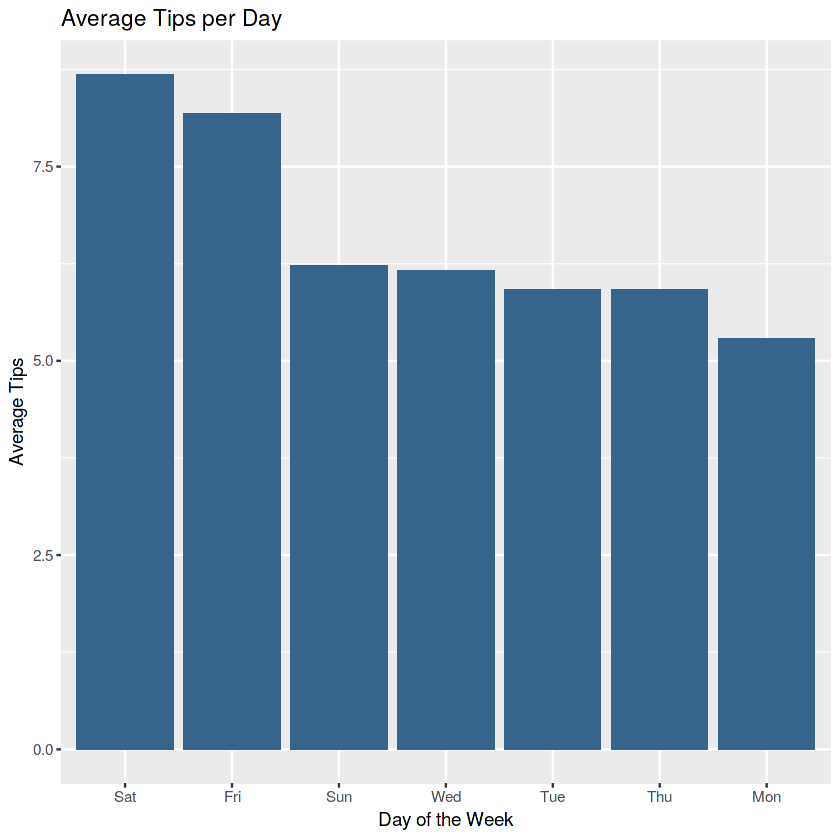

In [5]:
p2 = ggplot(salarybar, aes(x = daywk, y = dayav)) + 
    geom_bar(stat = 'identity', fill = "steelblue4")
p2 = p2 + scale_x_discrete(limits = c("Sat", "Fri", "Sun", "Wed", "Tue", "Thu", "Mon"))
p2 = p2 + xlab("Day of the Week") + 
    ylab("Average Tips") + 
    ggtitle("Average Tips per Day") #+ 
#     theme(panel.background = element_blank(), 
#             axis.ticks = element_blank())
p2

One thing I have heard the waiters complaining about is how the restaurant has gotten less busy since the summer, and they aren't making as much money. As we all know, humans aren't a very good judge of anything so I was skeptical about that claim since I work in a steakhouse which doesn't feel like it would be seasonal. Secondly, the managers all promise that the restaurant gets busy right around when the temperature starts to fall because people see this as "Steak Weather". I wanted to see if this was true, or if they were lying to the staff to prevent them from quitting and going elsewhere which did seem like a distinct possibility. 

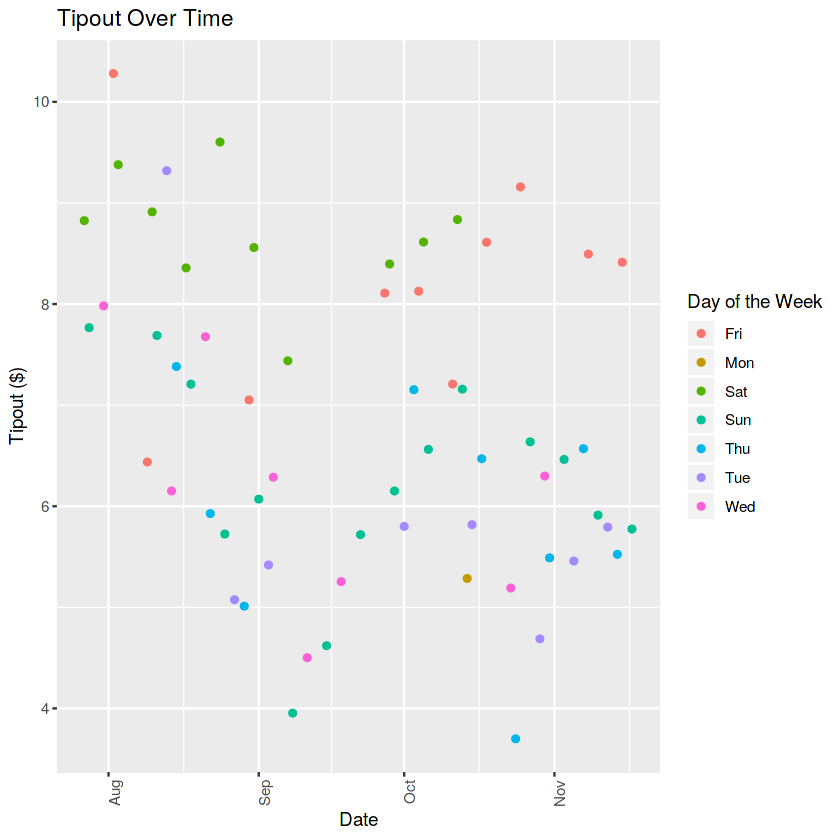

In [6]:
p = ggplot(salary_raw, aes(y = avtips, x = Date)) + 
    geom_point(aes(color = daywk)) +  
    ggtitle("Tipout Over Time") + 
    ylab("Tipout ($)")
p = p + labs(color = "Day of the Week")
p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1))
p

I included the grouping by the days of the week so you could see how consistent the spread was. It shows that Saturdays and Fridays were consistently the top earners (its not a few outliers that are really pulling my numbers up) and that it is a solid mix of the other days below that. 
Well it seems that the data is all over the place. There are no visible trends here that are easy to see with the naked eye, so I added a trendline in to see if there were any patterns. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



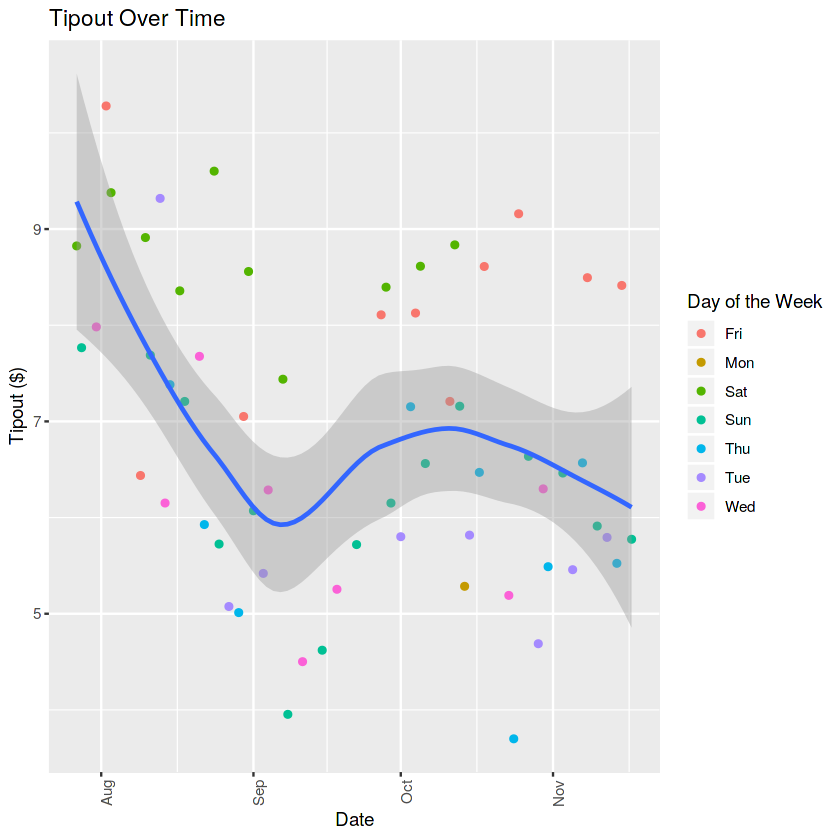

In [7]:
p = ggplot(salary_raw, aes(y = avtips, x = Date)) + 
    geom_point(aes(color = daywk)) + 
    geom_smooth() + 
    ggtitle("Tipout Over Time") + 
    ylab("Tipout ($)")
p = p + labs(color = "Day of the Week")
p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1))
p

So as you can see in the graph, there actually was a significant decrease in business in the restaurant from July. The data cuts off in mid-November because that is when I got a raise, so the % I got tipped out actually increased. I removed it from the data because it would show a spike at the very end, when in fact that is just because I commanded more money per day and not because the restuarant got more packed. 

Interestingly enough, the trendline decreased after mid-October, in direct defiance of what the managers promised all of us. Now I am perfectly happy with the outcome, because the less I have to work the better, but it does suck for my server friends who were making hundreds of dollars a night in tips in the fall, and who all seem to be making less now. 

One source of error is that there has been significant turnover since I joined, to the point that I am now in the top 20% in terms of seniority at the restaurant. A lot of the people who left had been career waitstaff so it is possible that they were getting higher tips because they were providing better service compared to everyone who is left behind, but I don't think that you could attribute all of the difference to that one factor. Another source is people might be paying more of their tips in cash now which the servers do not report, so it seems to me that everyone is making less, when in fact that's only what they want Uncle Sam to see. 

Either way, thanks to the data, it seems my best course of action is to work weekdays where it is supposedly slower and I can make the same amount of money. 
Thanks for reading!